# Combining Data From Multiple DataFrames


For this tutorial, air quality data about **NO2**
 is used, made available by OpenAQ and downloaded using the py-openaq package.

The air_quality_no2_long.csv data set provides 
 values for the measurement stations FR04014, BETR801 and London Westminster in respectively Paris, Antwerp and London.

Let's start by importing the packages and reading the data into a pandas DataFrame.

In [2]:
import pandas as pd
import openaq as oaq

In [3]:
air_quality_no2 = pd.read_csv("../data/air_quality_no2_long.csv", parse_dates=True)

Then, let's select only the relevant columns from our dataset. We are interested in the timestamp of the measurement (`date.utc`), the location where it was recorded (`location`), the type of air quality parameter measured (`parameter`), and the recorded value (`value`). 

This will help us focus on the essential data needed for further analysis & manipulation. 


In [4]:
air_quality_no2 = air_quality_no2[["date.utc", "location", "parameter", "value"]]

Now, let's get a quick look at the data


In [5]:
air_quality_no2.head()

,date.utc,location,parameter,value
0,2019-06-21 00:00:00+00:00,FR04014,no2,20.0
1,2019-06-20 23:00:00+00:00,FR04014,no2,21.8
2,2019-06-20 22:00:00+00:00,FR04014,no2,26.5
3,2019-06-20 21:00:00+00:00,FR04014,no2,24.9
4,2019-06-20 20:00:00+00:00,FR04014,no2,21.4


For this tutorial also, air quality data about Particulate matter less than 2.5 micrometers is used, made available by [OpenAQ](https://openaq.org) and downloaded using the [py-openaq](https://pypi.org/project/py-openaq/) package.

The `air_quality_pm25_long.csv` data set provides *PM₂₅* values for the measurement stations *FR04014*, *BETR801* and *London Westminster* in respectively Paris, Antwerp and London.


In [7]:
air_quality_pm25 = pd.read_csv("../data/air_quality_pm25_long.csv", parse_dates=True)

In [8]:
air_quality_pm25 = air_quality_pm25[["date.utc", "location",
                                     "parameter", "value"]]

In [9]:
air_quality_pm25.head()

,date.utc,location,parameter,value
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0
1,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5
2,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5
3,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0
4,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5


## How to combine data from multiple tables
#### Concatenating objects

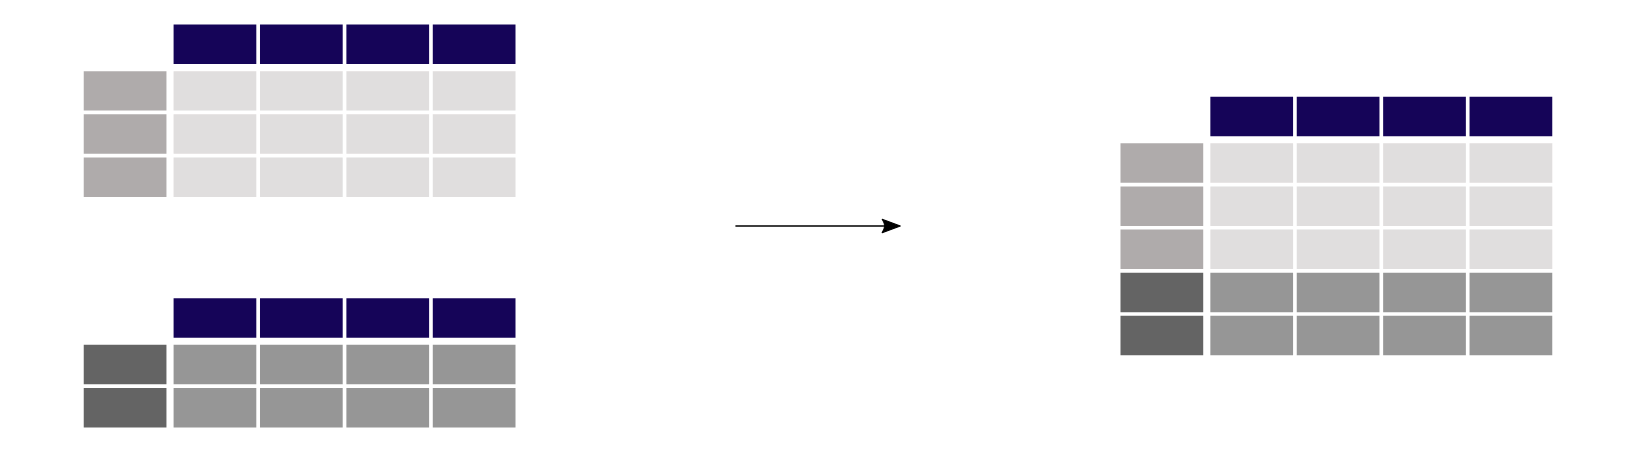

### Combining Measurements of NO₂ and PM₂.₅

Let's say that we want to now *combine* the measurements of *NO₂* and *PM₂.₅*, which are stored in two separate tables with a similar structure, into a single table.

In [10]:
air_quality = pd.concat([air_quality_pm25, air_quality_no2], axis=0)

In [11]:
air_quality.head()

,date.utc,location,parameter,value
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0
1,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5
2,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5
3,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0
4,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5


The `concat()` function in pandas allows us to merge multiple tables along a specified axis — either *row-wise* or *column-wise*.
* By default, concatenation is along axis 0
* Therefore, resulting table combines the rows of the input tables
* Think 'vertical stack'.

Let's check the shape of th eoriginal vs. concatenated tables to verify the operation result: 

In [12]:
print('Shape of the ``air_quality_pm25`` table: ', air_quality_pm25.shape)

Shape of the ``air_quality_pm25`` table:  (1110, 4)


In [13]:
print('Shape of the ``air_quality_no2`` table: ', air_quality_no2.shape)

Shape of the ``air_quality_no2`` table:  (2068, 4)


In [14]:
print('Shape of the resulting ``air_quality`` table: ', air_quality.shape)

Shape of the resulting ``air_quality`` table:  (3178, 4)


> **Result:**  
> The final table has **3178 rows**, which is the sum of the original tables: **1110 + 2068**.

> 📝 **Note:**  
> The `axis` argument is widely used in pandas functions. A `DataFrame` has two axes:
> - **axis=0**: Runs vertically, across rows.
> - **axis=1**: Runs horizontally, across columns.  
> Most operations, like concatenation and summary statistics, default to `axis=0` (rows), but they can also be applied across columns when needed.


### Maintaining the Origin of Data

Sorting the combined table by datetime (`date.utc`) allows us to see how the data from both tables merge. The `parameter` column helps distinguish between the two original tables:
- `"no2"` from `air_quality_no2`
- `"pm25"` from `air_quality_pm25`



In [15]:
air_quality = air_quality.sort_values("date.utc")
air_quality.head()

,date.utc,location,parameter,value
2067,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0
1003,2019-05-07 01:00:00+00:00,FR04014,no2,25.0
100,2019-05-07 01:00:00+00:00,BETR801,pm25,12.5
1098,2019-05-07 01:00:00+00:00,BETR801,no2,50.5
1109,2019-05-07 01:00:00+00:00,London Westminster,pm25,8.0


In this example, the `parameter` column ensures that we can identify where each data point came from. However, this is not always the case. 

The `concat` function provides a convenient solution with the `keys` argument, adding an additional (hierarchical) row index.

For example:

In [16]:
air_quality_ = pd.concat([air_quality_pm25, air_quality_no2], keys=["PM25", "NO2"])

In [17]:
air_quality_.head(100000)

date.utc            location parameter  value
PM25 0     2019-06-18 06:00:00+00:00             BETR801      pm25   18.0
     1     2019-06-17 08:00:00+00:00             BETR801      pm25    6.5
     2     2019-06-17 07:00:00+00:00             BETR801      pm25   18.5
     3     2019-06-17 06:00:00+00:00             BETR801      pm25   16.0
     4     2019-06-17 05:00:00+00:00             BETR801      pm25    7.5
...                              ...                 ...       ...    ...
NO2  2063  2019-05-07 06:00:00+00:00  London Westminster       no2   26.0
     2064  2019-05-07 04:00:00+00:00  London Westminster       no2   16.0
     2065  2019-05-07 03:00:00+00:00  London Westminster       no2   19.0
     2066  2019-05-07 02:00:00+00:00  London Westminster       no2   19.0
     2067  2019-05-07 01:00:00+00:00  London Westminster       no2   23.0

[3178 rows x 4 columns]

> 📝 **Note:**

>The existence of multiple row/column indices at the same time has not been mentioned within these tutorials.
> Hierarchical indexing (or *MultiIndex*) is a powerful pandas feature for handling high-dimensional data. While not covered in detail in this tutorial, remember that you can always flatten multi-level indices using `reset_index()`, e.g.:
> ```python
> air_quality.reset_index(level=0)
> ```
> Check out the [advanced indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html) guide for more details.

## Join tables using a common identifier

To enrich our dataset, let's **add station coordinates** from the metadata table to the measurements table.

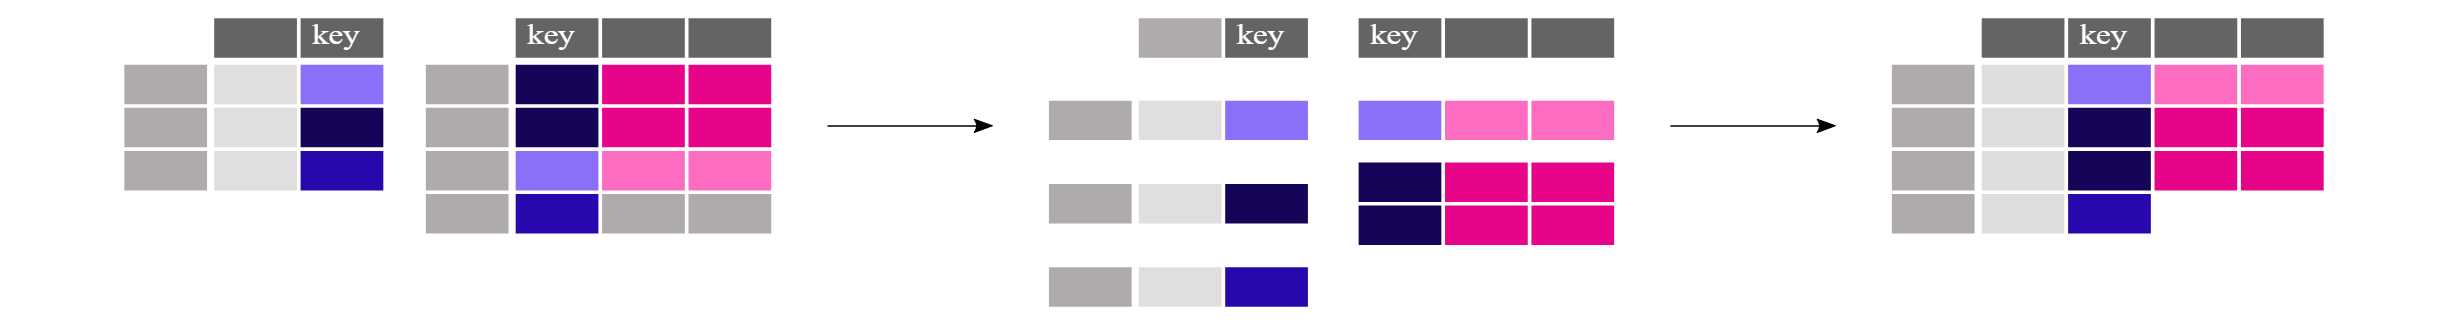

In [19]:
stations_coord = pd.read_csv("../data/air_quality_stations.csv")

In [20]:
stations_coord.head()

,location,coordinates.latitude,coordinates.longitude
0,BELAL01,51.23619,4.38522
1,BELHB23,51.17030,4.34100
2,BELLD01,51.10998,5.00486
3,BELLD02,51.12038,5.02155
4,BELR833,51.32766,4.36226


> **How?**  
> - We use the `merge()` function to join the **air quality data** (`air_quality`) with the **station coordinates** (`stations_coord`).
> - Both tables share a common column: `"location"`, which acts as the key.
> - A **left join** ensures we retain all locations present in the `air_quality` table.

> 📝 **Note:**  
> The dataset contains measurements for only three stations (*FR04014, BETR801, and London Westminster*). The join operation will only add coordinates for these stations to the dataset.


In [21]:
air_quality = pd.merge(air_quality, stations_coord, how= "left", on="location")

In [22]:
air_quality.head()

,date.utc,location,parameter,value,coordinates.latitude,coordinates.longitude
0,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,51.49467,-0.13193
1,2019-05-07 01:00:00+00:00,FR04014,no2,25.0,48.83724,2.39390
2,2019-05-07 01:00:00+00:00,FR04014,no2,25.0,48.83722,2.39390
3,2019-05-07 01:00:00+00:00,BETR801,pm25,12.5,51.20966,4.43182
4,2019-05-07 01:00:00+00:00,BETR801,no2,50.5,51.20966,4.43182


Let's recap what this operation has 'done'.

* Using the `merge()` fucntion, for *each of the rows* in the `air_quality` DF, the corresponding coordinates are added *from* the `stations_coord` table. 

* Both tables have the column `location` in common which is used as a **key** to combine the information.

* By choosing the `left` join, **only** the locations avaialble in the air_quality (left) table, i.e., from FR04014, BETR801 and London Westminster, end up in the resulting table.

* The `merge` function supports multiple join options similar to database-style operations.


And, finally, let's add the parameters' full description and name , provided by the parameters metadata table *to* the measurmens table. 

In [23]:
air_quality_parameters = pd.read_csv("../data/air_quality_parameters.csv")

air_quality_parameters.head()

,id,description,name
0,bc,Black Carbon,BC
1,co,Carbon Monoxide,CO
2,no2,Nitrogen Dioxide,NO2
3,o3,Ozone,O3
4,pm10,Particulate matter less than 10 micrometers in...,PM10


In [24]:
air_quality = pd.merge(air_quality, air_quality_parameters, how='left', left_on='parameter', right_on='id')

In [25]:
air_quality.head()

,date.utc,location,parameter,value,coordinates.latitude,coordinates.longitude,id,description,name
0,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,51.49467,-0.13193,no2,Nitrogen Dioxide,NO2
1,2019-05-07 01:00:00+00:00,FR04014,no2,25.0,48.83724,2.39390,no2,Nitrogen Dioxide,NO2
2,2019-05-07 01:00:00+00:00,FR04014,no2,25.0,48.83722,2.39390,no2,Nitrogen Dioxide,NO2
3,2019-05-07 01:00:00+00:00,BETR801,pm25,12.5,51.20966,4.43182,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
4,2019-05-07 01:00:00+00:00,BETR801,no2,50.5,51.20966,4.43182,no2,Nitrogen Dioxide,NO2


Unlike before, this time we don’t have a column with an identical name in both tables. Instead:
- The `parameter` column in the `air_quality` table corresponds to the `id` column in the `air_quality_parameters_name` table.
- To merge them, we used `left_on="parameter"` and `right_on="id"` instead of the default `on=` argument.

i.e.,

Compared to the previous example, there is no common column name. However, the `parameter` column in the `air_quality` table and the `id` column in the `air_quality_parameters_name` both provide the measured variable in a common format. The `left_on` and `right_on` arguments are used here (instead of just `on`) to make the link between the two tables.

## 🔹 REMEMBER

- Multiple tables can be concatenated **both column-wise and row-wise** using the `concat` function.
- For **database-like merging/joining** of tables, use the `merge` function.